In [171]:
import os
import glob
import json
import shutil

In [55]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.

Bad key "text.kerning_factor" on line 4 in
/raj-learn/lth/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [178]:
from matplotlib import font_manager
fpath = '/raj-learn/envs/contextual_repr_analysis/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf'
prop = font_manager.FontProperties(fname=fpath)
rcParams['font.family'] = prop.get_name()
rcParams['mathtext.fontset'] = 'cm'
rcParams['axes.unicode_minus'] = False

### Analysis 1: compare simple linear probe performance at increasing sparsity
For each task, make a heatmap plotting performance for each (model, layer) combination.

In [30]:
probing_result_dir = '/raj-learn/checkpoints/probing_models'
tasks = ['ptb_pos_tagging', 
         'ccg_supertagging', 
         'adposition_supersense_tagging_function',
         'adposition_supersense_tagging_role',
         'event_factuality',
         'coref_resolution',
         'semantic_dep_prediction'
        ]
models = ['LTH' + str(i) for i in range(8)]
layers = list(range(6))

In [154]:
%%time
# test
# shutil.rmtree('/raj-learn/checkpoints/probing_models/LTH0/adposition_supersense_tagging_function/replicate2_layer1/')
for rep in range(1, 6):
#     for task in ['adposition_supersense_tagging_function', 'adposition_supersense_tagging_role', 'coref_resolution']:
    for task in ['coref_resolution']:
        dirs = glob.glob(f'{probing_result_dir}/LTH*/{task}/replicate{rep}_layer*/')
        print(len(dirs))
        for dirpath in dirs:
            shutil.rmtree(dirpath)

18
18
18
17
12
CPU times: user 82.2 ms, sys: 105 ms, total: 187 ms
Wall time: 6.81 s


In [128]:
%%time
val_perfs = {'all': [], 'accuracy' : [], 'accuracy3' : [], 'pearson_r' : []}
test_perfs = {'all': [], 'accuracy' : [], 'accuracy3' : [], 'pearson_r' : []}
metric_dict = {task : {model : [] for model in models} for task in tasks}

for task in tasks:
    for model in models:
        for layer in layers:
            path = f'{probing_result_dir}/{model}/{task}/*_layer{layer}/metrics.json'
            files = glob.glob(path)
            scores = []
            if len(files) == 0:
                print(task, model, layer)
                metric_dict[task][model].append(np.nan)
                continue
            for file in files:
                with open(file) as f:
                    metrics = json.load(f)
                    if task == 'event_factuality':
                        val = metrics['validation_pearson_r']
                        val_perfs['all'].append(val)
                        val_perfs['pearson_r'].append(val)
                        test = metrics['test_pearson_r']
                        test_perfs['all'].append(test)
                        test_perfs['pearson_r'].append(test)
                        scores.append(test)
                    else:
                        val, val3 = metrics['validation_accuracy'], metrics['validation_accuracy3']
                        val_perfs['all'].extend([val, val3])
                        val_perfs['accuracy'].append(val)
                        val_perfs['accuracy3'].append(val3)
                        test, test3 = metrics['test_accuracy'], metrics['test_accuracy3']
                        test_perfs['all'].extend([test, test3])
                        test_perfs['accuracy'].append(test)
                        test_perfs['accuracy3'].append(test3)
                        scores.append(test)
#             avg_score = np.mean(scores)
            metric_dict[task][model].extend(scores)
        metric_dict[task][model] = np.array(metric_dict[task][model])

ptb_pos_tagging LTH7 0
ptb_pos_tagging LTH7 1
ptb_pos_tagging LTH7 2
ptb_pos_tagging LTH7 3
ptb_pos_tagging LTH7 4
ptb_pos_tagging LTH7 5
ccg_supertagging LTH4 0
ccg_supertagging LTH4 1
event_factuality LTH5 0
event_factuality LTH5 1
event_factuality LTH5 2
event_factuality LTH5 3
event_factuality LTH5 4
event_factuality LTH5 5
coref_resolution LTH7 0
coref_resolution LTH7 1
coref_resolution LTH7 2
coref_resolution LTH7 3
coref_resolution LTH7 4
coref_resolution LTH7 5
semantic_dep_prediction LTH4 0
CPU times: user 256 ms, sys: 267 ms, total: 523 ms
Wall time: 2.4 s


In [132]:
print(metric_dict['coref_resolution'])

{'LTH0': array([0.79766411, 0.68411377, 0.73818536, 0.79095923, 0.68854764,
       0.7961501 , 0.76911431, 0.62625716, 0.64983238, 0.7993944 ,
       0.77441332, 0.77441332]), 'LTH1': array([0.79798854, 0.67989618, 0.73580621, 0.81572402, 0.71709744,
       0.80047583, 0.77571104, 0.64853466, 0.64831837, 0.80285498,
       0.78782308, 0.78782308]), 'LTH2': array([0.78230778, 0.66875743, 0.7082297 , 0.79896183, 0.69719909,
       0.80134098, 0.80080026, 0.64399265, 0.63328647, 0.80025954,
       0.75375798, 0.75375798]), 'LTH3': array([0.78252406, 0.70747269, 0.71753001, 0.7961501 , 0.6939548 ,
       0.79506867, 0.79571753, 0.68638477, 0.6526441 , 0.80588299,
       0.74672867, 0.74672867]), 'LTH4': array([0.7946361 , 0.72282903, 0.71753001, 0.79701525, 0.67362388,
       0.79982697, 0.79496053, 0.64983238, 0.66800043, 0.78457878,
       0.75819185, 0.76976317]), 'LTH5': array([0.68141019, 0.6987131 , 0.70455283, 0.66367471, 0.67978804,
       0.75819185]), 'LTH6': array([0.79420353, 0

In [118]:
from scipy.stats import pearsonr, spearmanr

print(spearmanr(val_perfs['all'], test_perfs['all']))
print(spearmanr(val_perfs['accuracy'], test_perfs['accuracy']))
print(spearmanr(val_perfs['accuracy3'], test_perfs['accuracy3']))
print(spearmanr(test_perfs['accuracy'], test_perfs['accuracy3']))
print(spearmanr(val_perfs['accuracy'], val_perfs['accuracy3']))

SpearmanrResult(correlation=0.9933081513517968, pvalue=0.0)
SpearmanrResult(correlation=0.9743038356909747, pvalue=0.0)
SpearmanrResult(correlation=0.9842408675016986, pvalue=0.0)
SpearmanrResult(correlation=0.32505851978590466, pvalue=3.08504880258308e-14)
SpearmanrResult(correlation=0.2753145843232386, pvalue=1.7628691130934784e-10)


ptb_pos_tagging


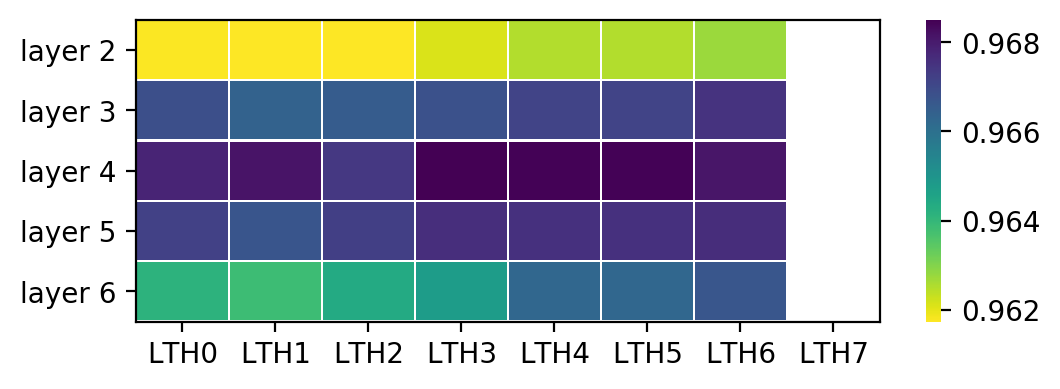

ccg_supertagging


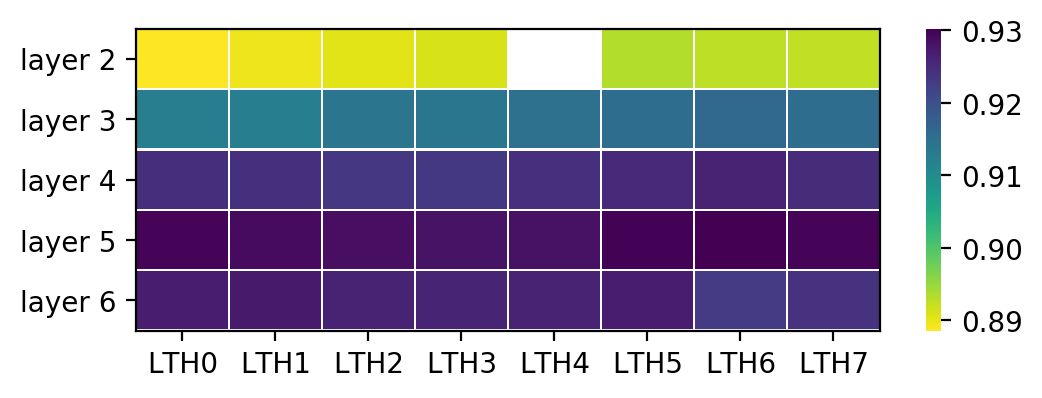

adposition_supersense_tagging_function


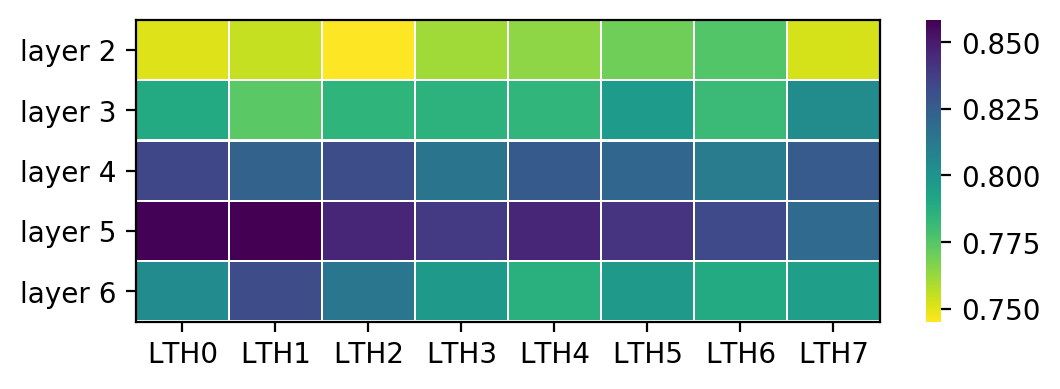

adposition_supersense_tagging_role


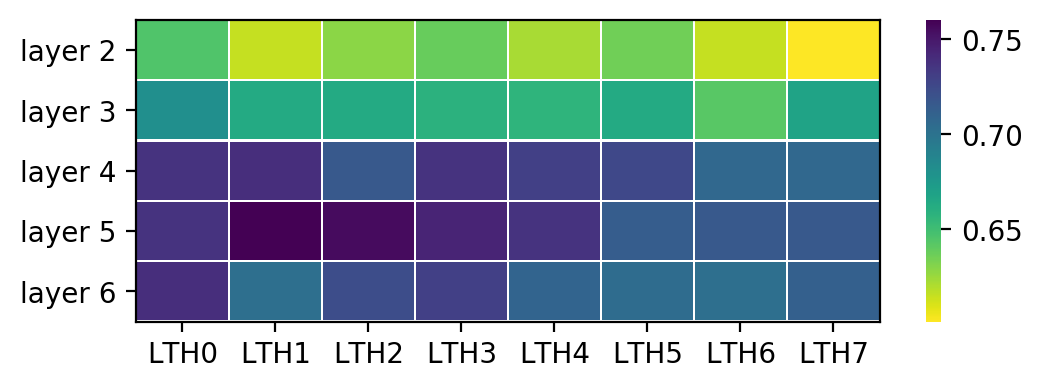

event_factuality


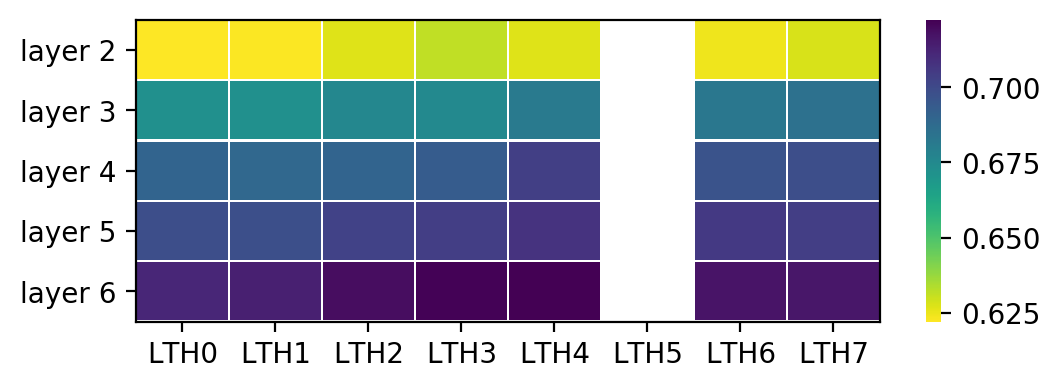

coref_resolution


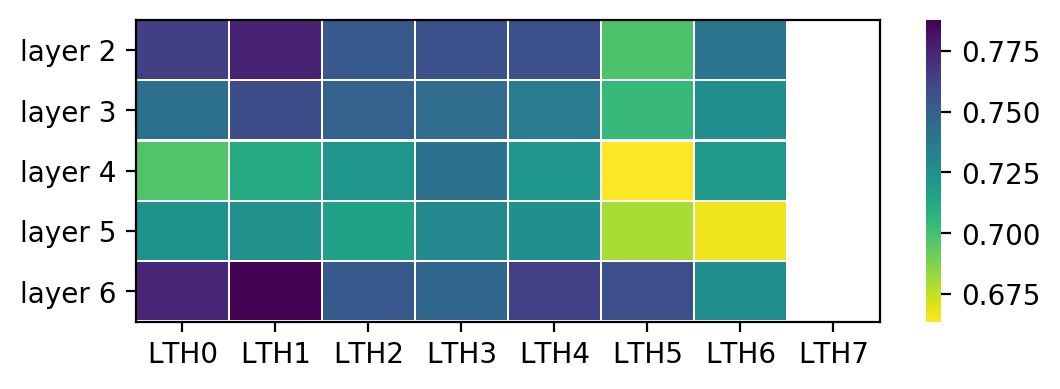

semantic_dep_prediction


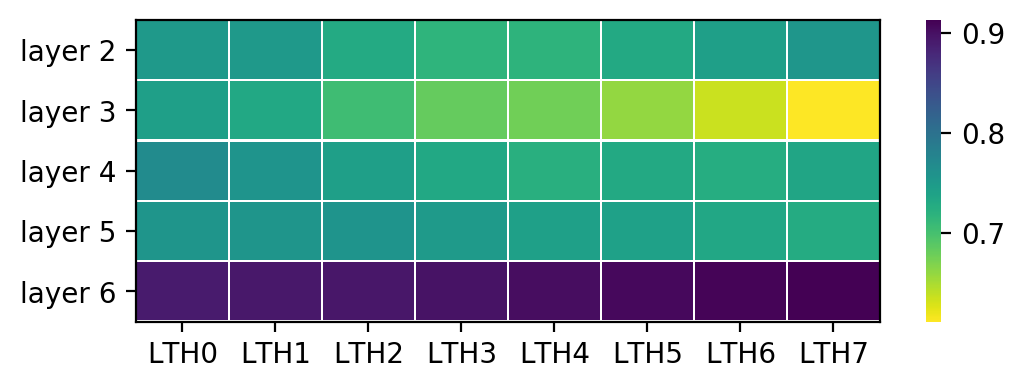

In [119]:
for task in metric_dict:
    print(task)
    plt.figure(figsize=(6, 2), dpi=200)
    df = pd.DataFrame(metric_dict[task], index=[f'layer {i+1}' for i in range(6)])
#     ax = sns.heatmap(data=df, cmap='RdBu_r', lw=0.5, linecolor='white')
    ax = sns.heatmap(data=df.iloc[1:,:], cmap='viridis_r', lw=0.5) # vmin=np.nanmin(df.values), vmax=np.nanmax(df.values))
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    plt.show()

In [98]:
df.values

array([[0.93419335, 0.93544769, 0.93590659, 0.9377218 , 0.93781358,
        0.93781358, 0.93781358,        nan],
       [0.96176831, 0.96173771, 0.96175811, 0.96211503, 0.96251275,
        0.96251275, 0.9627575 ,        nan],
       [0.96688762, 0.96641852, 0.96657149, 0.96681623, 0.96715276,
        0.96715276, 0.96753008,        nan],
       [0.96782582, 0.96816235, 0.96740771, 0.96850908, 0.96847848,
        0.96847848, 0.96812156,        nan],
       [0.96720375, 0.96671426, 0.96725474, 0.96762186, 0.96757087,
        0.96757087, 0.96765246,        nan],
       [0.9641648 , 0.96385886, 0.96438915, 0.96479706, 0.96627575,
        0.96627575, 0.96670406,        nan]])

In [121]:
mean_perf_per_task = {}
for task in tasks:
    task_scores = []
    for model in models:
        task_scores.extend(metric_dict[task][model])
    mean_perf_per_task[task] = np.nanmean(task_scores)
mean_perf_per_task

{'ptb_pos_tagging': 0.9610818934957217,
 'ccg_supertagging': 0.8923470192875058,
 'adposition_supersense_tagging_function': 0.767271505376344,
 'adposition_supersense_tagging_role': 0.6573540706605223,
 'event_factuality': 0.6605810507924639,
 'coref_resolution': 0.7329249640810147,
 'semantic_dep_prediction': 0.7646356731806286}

In [122]:
# instead of raw score, track difference of metric from mean for that task across all models/layers
metric_gain_dict = {task : {model : [] for model in models} for task in tasks}
for task in tasks:
    for model in models:
        metric_gain_dict[task][model] = metric_dict[task][model] - mean_perf_per_task[task]

ptb_pos_tagging


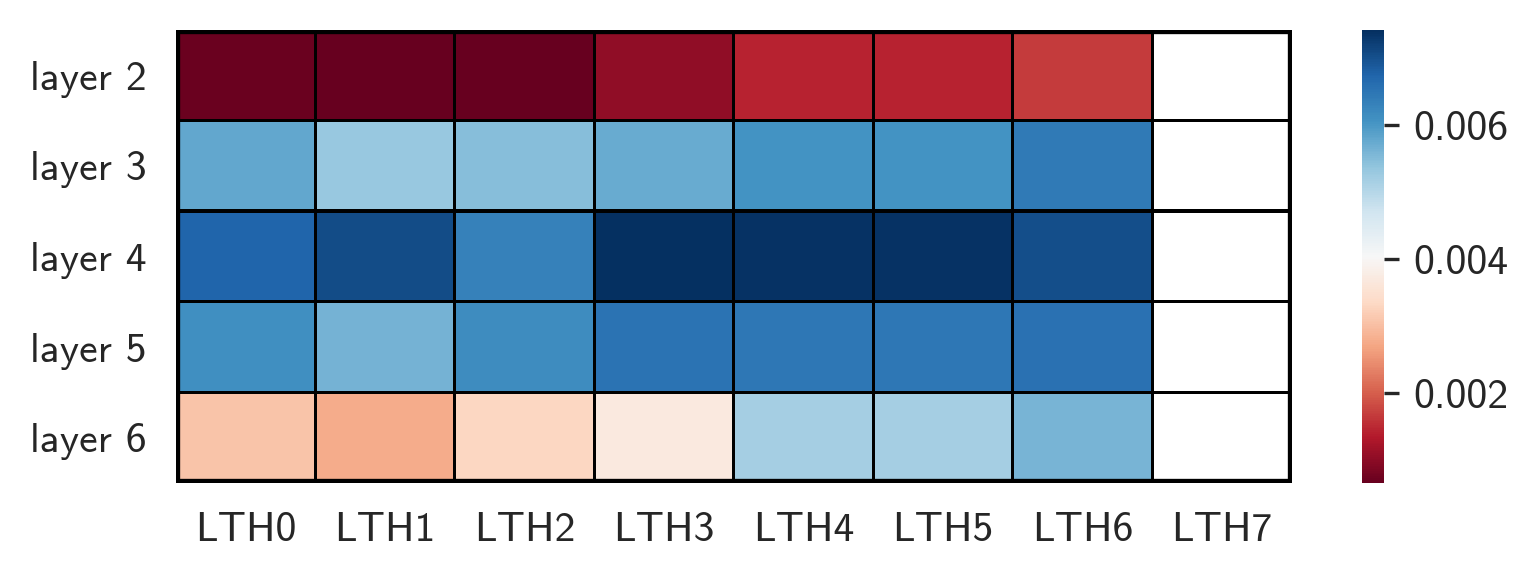

ccg_supertagging


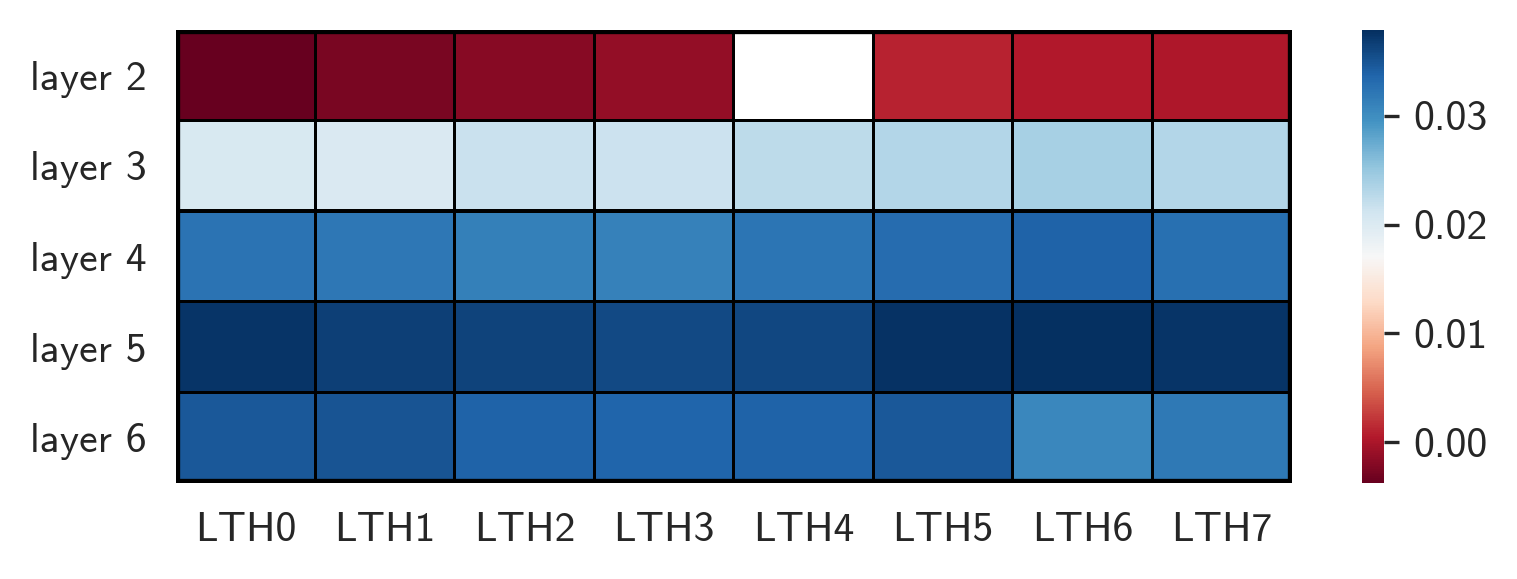

adposition_supersense_tagging_function


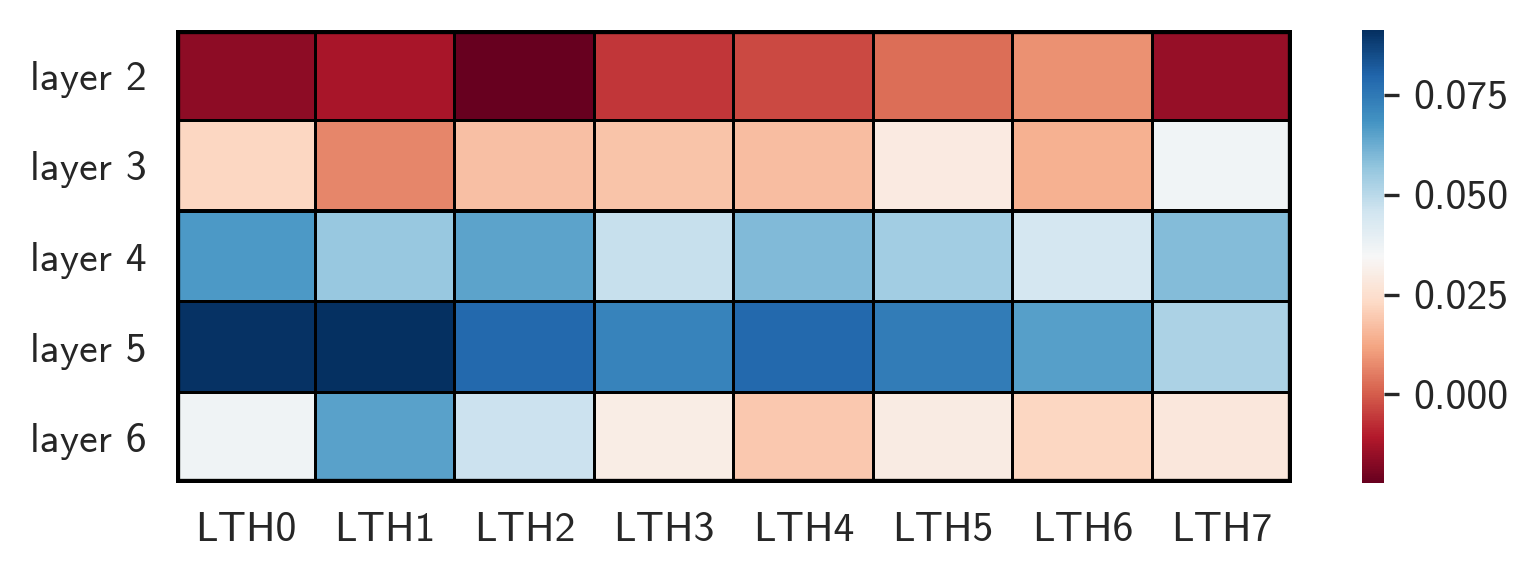

adposition_supersense_tagging_role


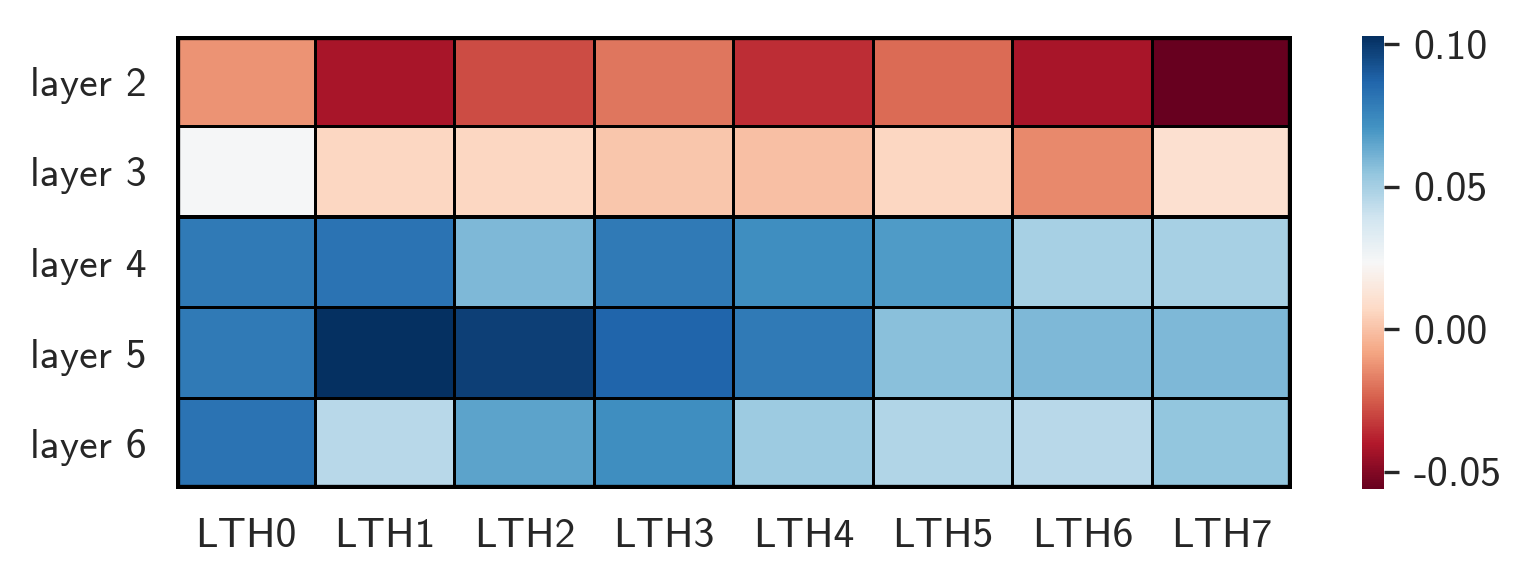

event_factuality


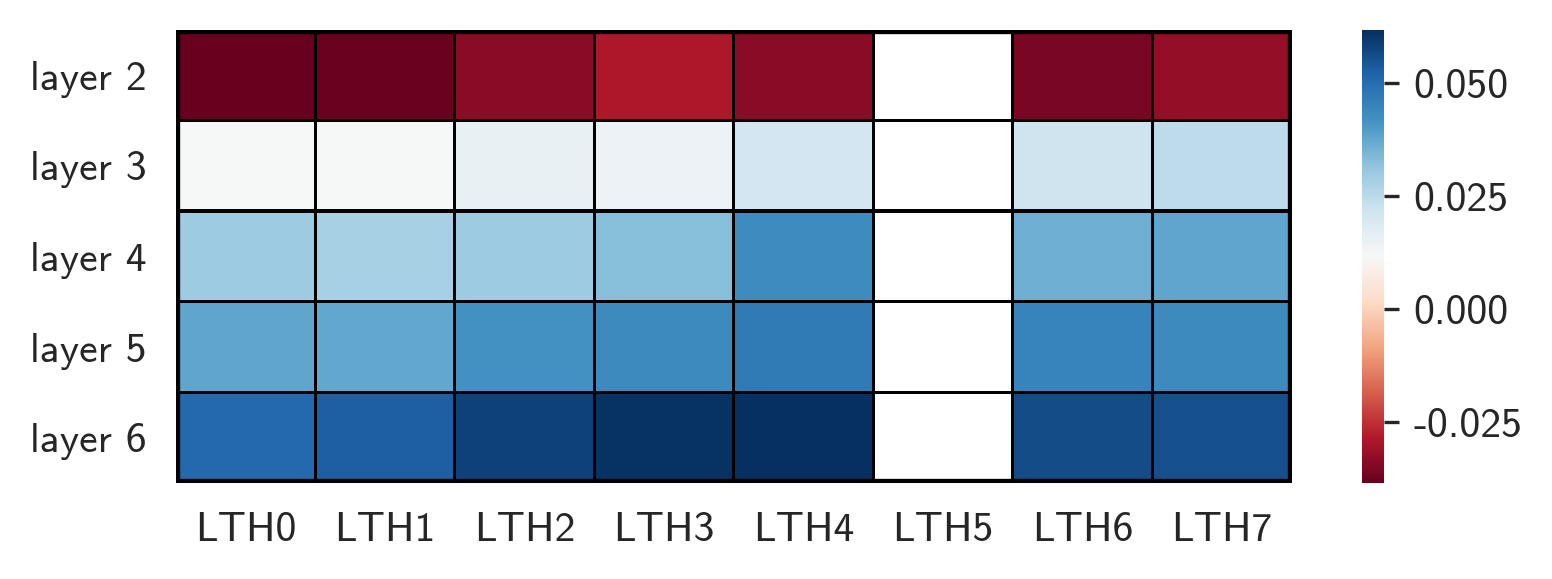

coref_resolution


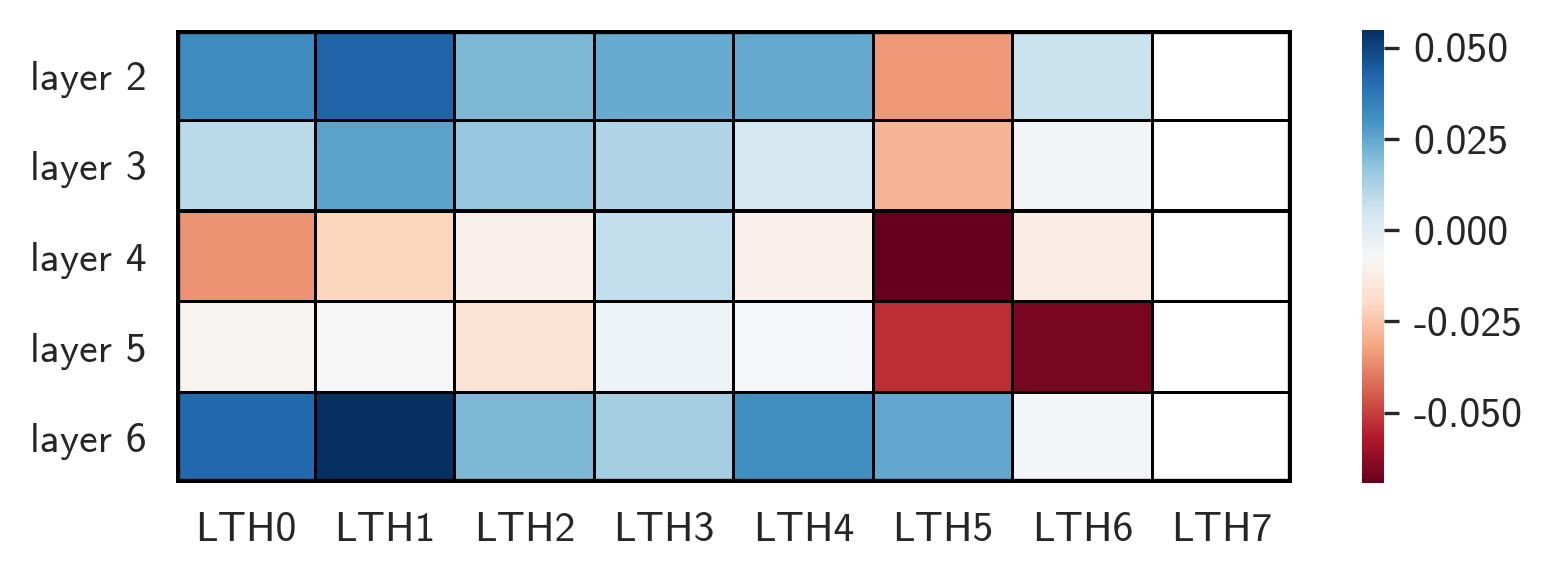

semantic_dep_prediction


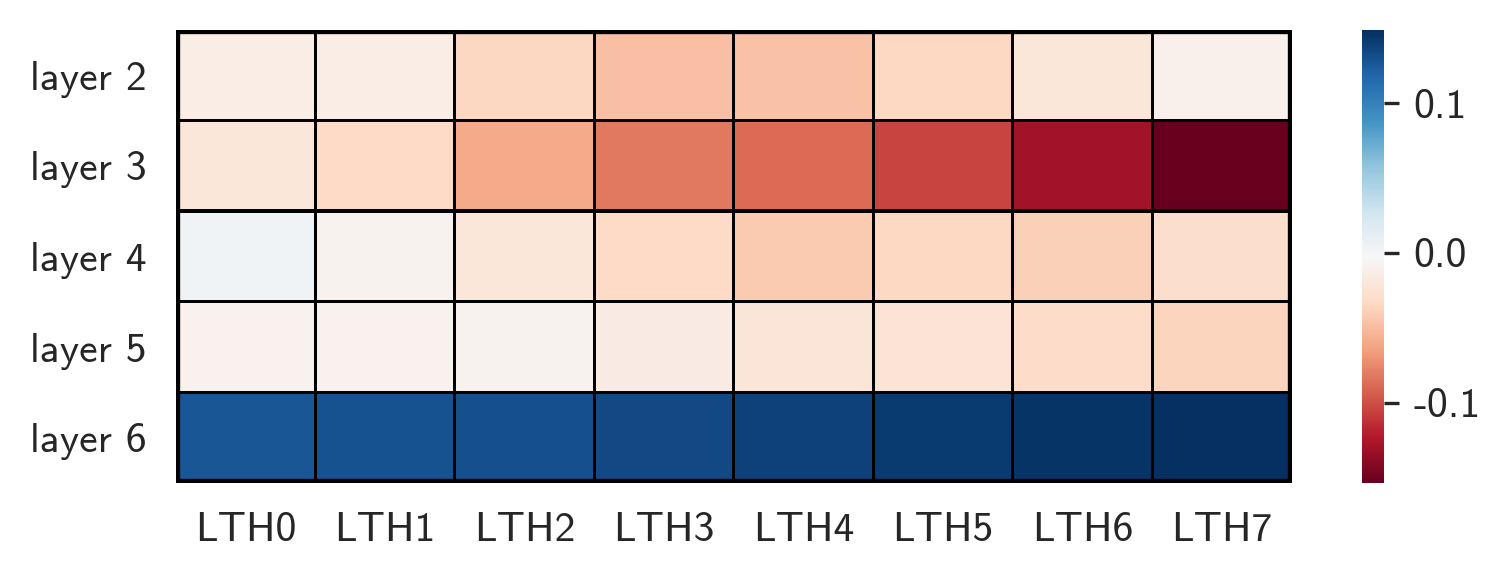

In [196]:
from matplotlib.patches import Rectangle

for task in metric_dict:
    print(task)
    plt.figure(figsize=(6, 2), dpi=300)
    df = pd.DataFrame(metric_gain_dict[task], index=[f'layer {i+1}' for i in range(6)])
#     ax = sns.heatmap(data=df, cmap='RdBu_r', lw=0.5, linecolor='white')
    fix()
    ax = sns.heatmap(data=df.iloc[1:,:], cmap='RdBu', lw=0.5, linecolor='k') # vmin=np.nanmin(df.values), vmax=np.nanmax(df.values))
#     for _, spine in ax.spines.items():
#         spine.set_visible(True)
    ax.add_patch(Rectangle((0, 0), len(df.columns), len(df.index)-1, fill=False, edgecolor='black', lw=2))
    plt.show()

In [137]:
model_metric_distributions = {model : [] for model in models}
for task in tasks:
    for model in models:
        model_metric_distributions[model].extend(metric_gain_dict[task][model])

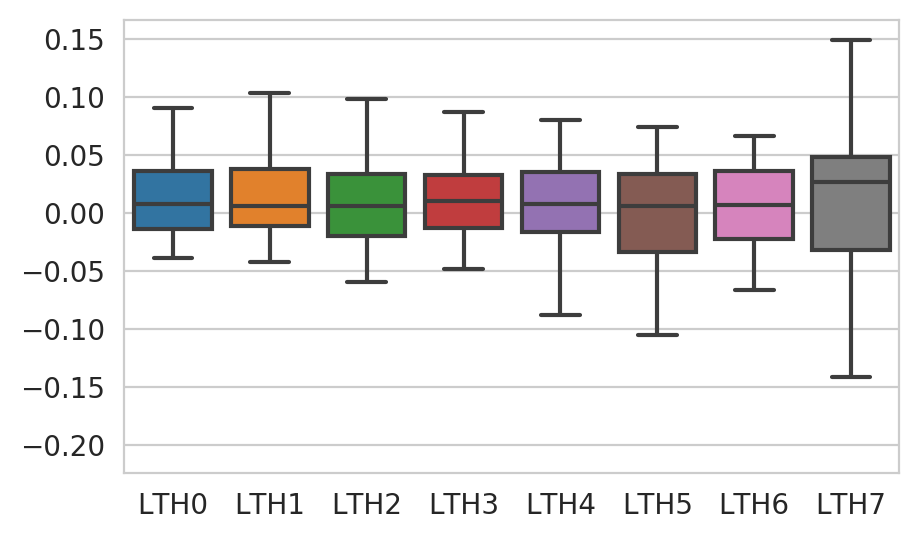

In [153]:
df = pd.DataFrame(model_metric_distributions)

sns.set_style('whitegrid')
plt.figure(figsize=(5,3), dpi=200)
ax = plt.gca()
sns.boxplot(data=df, ax=ax, fliersize=0)
# sns.swarmplot(data=df, color=".25", ax=ax)